In [333]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime

from IPython.display import display

In [334]:
dataset = pd.read_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Python\Kaggle\Exploratory Data Analysis Netflix Shows\dataset\netflix_titles.csv")

display(dataset.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [335]:
print("Shape of dataset = %d Baris & %d Kolom"%dataset.shape)
print("Informasi dataset : ")
display(dataset.info())
print("Mengecek Missing Value : ")
display(dataset.isnull().sum())

Shape of dataset = 8807 Baris & 12 Kolom
Informasi dataset : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


None

Mengecek Missing Value : 


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## High Level EDA

In [336]:
print("Mengecek Missing Value : ")
display(dataset.isnull().sum())

missing_value_columns = dataset.columns[dataset.isnull().any()].to_list()
display(missing_value_columns)

Mengecek Missing Value : 


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

['director', 'cast', 'country', 'date_added', 'rating', 'duration']

In [337]:
dataset["director"] = dataset["director"].fillna("Anonymous")
dataset["cast"] = dataset["cast"].fillna("Anonymous")
dataset["country"] = dataset["country"].fillna("Anonymous")

In [338]:
print("Mengecek Missing Value : ")
display(dataset.isnull().sum())

missing_value_columns = dataset.columns[dataset.isnull().any()].to_list()
dataset = dataset.dropna()

print("Mengecek Missing Value : ")
display(dataset.isnull().sum())

Mengecek Missing Value : 


show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

Mengecek Missing Value : 


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [339]:
dataset["date_added"] = pd.to_datetime(dataset["date_added"])
dataset["release_year"] = dataset["release_year"].astype(int)
display(dataset.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Anonymous,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Anonymous,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Anonymous,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Anonymous,Anonymous,Anonymous,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Anonymous,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


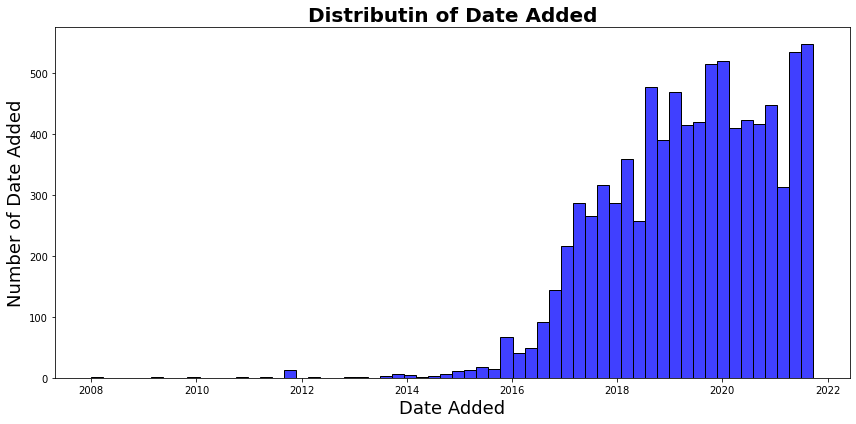

In [340]:
fig, axs = plt.subplots(1, 1, figsize=(12, 6))
sns.histplot(data=dataset, x="date_added", color="blue", ax=axs)
axs.set_title("Distributin of Date Added", fontsize=20, fontweight="bold")
axs.set_xlabel("Date Added", fontsize=18)
axs.set_ylabel("Number of Date Added", fontsize=18)
plt.tight_layout()
plt.show()

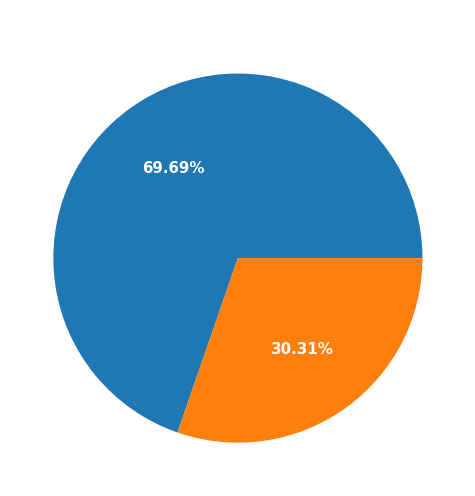

In [341]:
index_unique_data_type = dataset["type"].value_counts().index
values_unique_data_type = dataset["type"].value_counts().values

fig, axs = plt.subplots(1, 1, figsize=(7, 7))
axs.pie(x=values_unique_data_type, labels=index_unique_data_type, autopct="%0.2f%%", textprops={"color":"white",
                                                                                                "fontsize" : 15,
                                                                                                "fontweight": "bold"})
axs.set_title("Composition of Unique Type Data Film", fontsize=20, fontweight="bold", color="white")
plt.tight_layout()
plt.show()

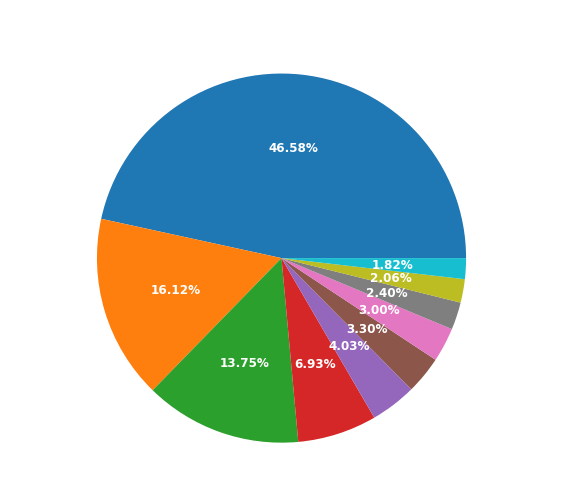

In [342]:
index_unique_data_country = dataset["country"].value_counts().head(10).index
values_unique_data_country = dataset["country"].value_counts().head(10).values

fig, axs = plt.subplots(1, 1, figsize=(7, 7))
axs.pie(x=values_unique_data_country, labels=index_unique_data_country, autopct="%0.2f%%", textprops={"color":"white",
                                                                                                      "fontsize" : 12,
                                                                                                      "fontweight": "bold"})
axs.set_title("Top 10 Composition of Unique Country Data Film", fontsize=20, fontweight="bold", color="white")
plt.tight_layout()
plt.show()

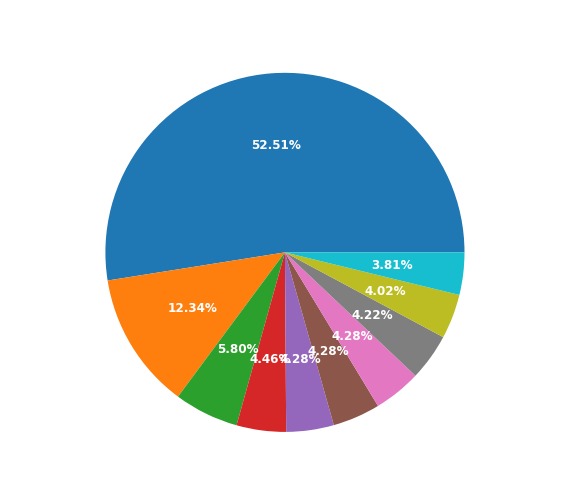

In [343]:
index_unique_data_duration = dataset["duration"].value_counts().head(10).index
values_unique_data_duration = dataset["duration"].value_counts().head(10).values

fig, axs = plt.subplots(1, 1, figsize=(7, 7))
axs.pie(x=values_unique_data_duration, labels=index_unique_data_duration, autopct="%0.2f%%", textprops={"color":"white",
                                                                                                      "fontsize" : 12,
                                                                                                      "fontweight": "bold"})
axs.set_title("Top 10 Composition of Unique duration Data Film", fontsize=20, fontweight="bold", color="white")
plt.tight_layout()
plt.show()